In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<Axes: xlabel='label'>

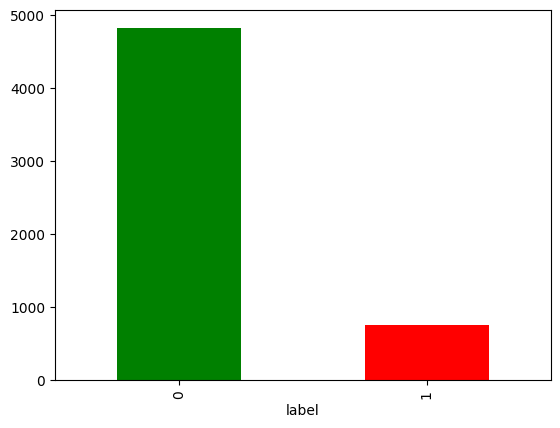

In [29]:
df.label.value_counts().plot(kind='bar', color=['green', 'red'])

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
stop_words=stopwords.words('english')
lemma = WordNetLemmatizer()

In [12]:
def text_preprocessing(text):
    # Make all words lowercase
    text=text.lower()

    # Remove  punction,number & spical char
    text=re.sub('[^a-zA-z]',' ',text)
 
    # Single char removel
    text=re.sub(r'\s+[a-zA-z]\s+',' ',text)

    # Remove multi spaces
    text=re.sub(r'\s+',' ',text)

    # Make a sentence to toknize
    tokens=word_tokenize(text)

    # Remove Stopwords
    final_token=[i for i in tokens if i not in stop_words]

    # Apply lemma
    final_words=[]
    for i in final_token:
        if len(i)>2:
            word=lemma.lemmatize(i)
            final_words.append(word)
    return ' '.join(final_words)

In [15]:
df['Clean_Text']=df['text'].apply(lambda x: text_preprocessing(x))
print('Text Preprocessing is done')

Text Preprocessing is done


In [16]:
x=df['Clean_Text']
y=df['label']

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [18]:
# Convert word to number
tokenizer=Tokenizer(num_words=10000)

# Creat a mapping of words to number 
tokenizer.fit_on_texts(x_train)

# Transforming text into sequences
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [19]:
# Padding---> Ensuring all sequences are of the same lenght
max_len=100

x_train_pad=pad_sequences(x_train_seq,maxlen=max_len)
x_test_pad=pad_sequences(x_test_seq,maxlen=max_len)

In [30]:
model=Sequential()

model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_len))
model.add(BatchNormalization())
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
model.summary()

/opt/anaconda3/envs/studentgator/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [32]:
history = model.fit(
    x_train_pad, 
    y_train, 
    epochs=5,  
    batch_size=32, 
    validation_data=(x_test_pad,y_test)
)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8987 - loss: 0.2642 - val_accuracy: 0.8655 - val_loss: 0.7271
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9902 - loss: 0.0373 - val_accuracy: 0.8798 - val_loss: 0.4551
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9957 - loss: 0.0177 - val_accuracy: 0.9722 - val_loss: 0.1299
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9997 - loss: 0.0042 - val_accuracy: 0.9812 - val_loss: 0.1010
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9821 - val_loss: 0.1116


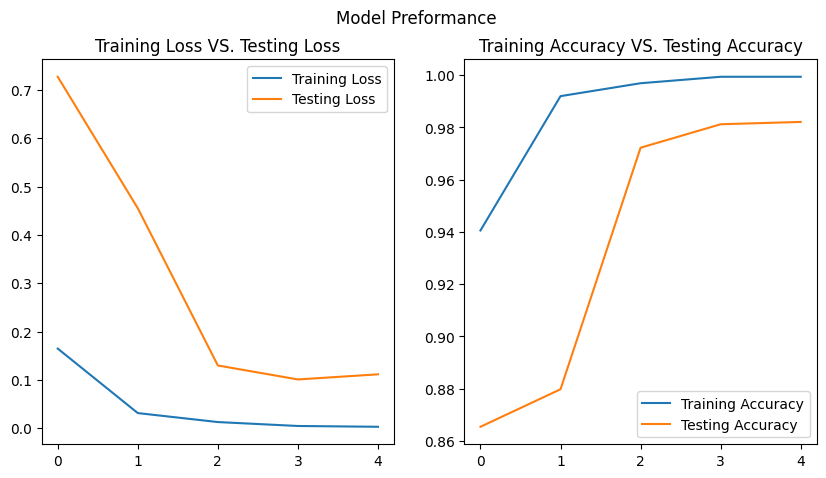

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Model Preformance')
ax[0].plot(history.history['loss'],label='Training Loss')
ax[0].plot(history.history['val_loss'],label='Testing Loss')
ax[0].set_title('Training Loss VS. Testing Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title('Training Accuracy VS. Testing Accuracy')
ax[1].legend()

In [34]:
model.save('spam_classifier.h5')

In [35]:
from keras.models import load_model
model = load_model('spam_classifier.h5')

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,461,636 (5.58 MB)

 Trainable params: 1,461,378 (5.57 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2 (12.00 B)

In [37]:
tokenizer_json = tokenizer.to_json()

In [38]:
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer_json)

In [1]:
import gradio as gr
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
import json
import pathlib

# ---------- Load model & tokenizer ----------
MODEL_PATH = pathlib.Path("spam_classifier.h5")
TOKENIZER_PATH = pathlib.Path("tokenizer.json")
MAX_LEN = 100          # must match training time

model = load_model(MODEL_PATH)

with TOKENIZER_PATH.open() as f:
    tokenizer = tokenizer_from_json(f.read())

# ---------- Inference helper ----------
def classify_sms(text: str) -> tuple[str, str]:
    """
    Returns (label, confidence_string) for the given SMS text.
    """
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    prob_spam = float(model.predict(padded, verbose=0)[0][1])  # [spam_prob]

    label = "🚫 Spam" if prob_spam > 0.5 else "✅ Not Spam"
    conf  = f"{prob_spam:.2%} chance of spam"
    return label, conf

# ---------- Gradio UI ----------
demo = gr.Interface(
    fn=classify_sms,
    inputs=gr.Textbox(
        lines=6,
        placeholder="Type or paste an SMS message…",
        label="✉️ Enter your message here"
    ),
    outputs=[
        gr.Label(label="Result"),
        gr.Textbox(label="Confidence", interactive=False)
    ],
    title="📩 Spam Detector",
    description="Enter an SMS message and find out if it's **Spam** or **Not Spam**.",
    examples=[
        ["Congratulations! You’ve won a free cruise to the Bahamas. Reply NOW to claim."],
        ["Hey, are we still on for lunch tomorrow?"]
    ],
    theme="soft"
)

if __name__ == "__main__":
    demo.launch(share=True)


c:\Users\V16RKhalil\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
